In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('D:\ex1data2.txt',names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
def normalize_feature(data):
    return (data-data.mean())/data.std()


In [22]:
data=normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


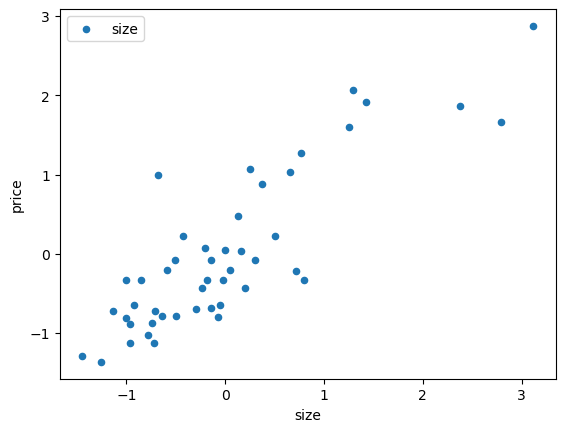

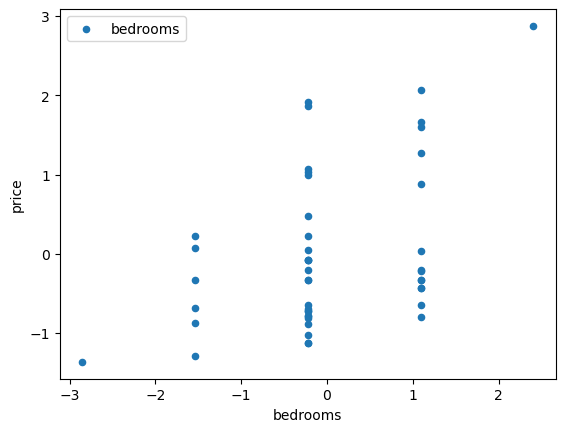

In [34]:
data.plot.scatter('size','price',label='size')
plt.show()
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

In [23]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [24]:
X=data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [35]:
y=data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [50]:
X.shape

(47, 3)

In [38]:
y=y.values
y.shape

(47,)

In [41]:
y=y.reshape(47,1)

In [51]:
def costFunction(X,y,theta):
    inner =np.power( X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [53]:
theta = np.zeros((3,1))
cost_init=costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [54]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta,costs

In [55]:
alpha=0.02
iters=2000
theta,costs = gradientDescent(X,y,theta,alpha,iters)

0.47186307832380486
0.14769069097087112
0.13361260686272108
0.13120498443304696
0.1307783896412616
0.13070277225055463
0.1306893683909453
0.13068699243667858
0.13068657127748678
0.1306864966232447
0.13068648339011107
0.1306864810444195
0.1306864806286247
0.13068648055492132
0.13068648054185675
0.1306864805395409
0.1306864805391304
0.13068648053905763
0.13068648053904477
0.13068648053904247


In [56]:
theta

array([[-1.01337378e-16],
       [ 8.84765973e-01],
       [-5.31788053e-02]])